In [92]:
import numpy as np
from basic_css_code import construct_HGP_code

H = np.array([[1, 1, 0],
              [0, 1, 1]
], dtype=int)

Hx, Hz = construct_HGP_code(H)
print("H:")
print(H)
print("Hx shape:", Hx.shape)
print("Hx:")
print(Hx.toarray())
print("Hz shape:", Hz.shape)
print("Hz:")
print(Hz.toarray())


Hx shape: (6, 13)
Hz shape: (6, 13)
Hx:
[[1 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 0 0 0 1 1 0 0]
 [0 0 1 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 1 0 0 0 1 1]
 [0 0 0 0 0 1 0 0 1 0 0 0 1]]
Hz:
[[1 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 1 1 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 1]]
H:
[[1 1 0]
 [0 1 1]]
Hx shape: (6, 13)
Hx:
[[1 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 0 0 0 1 1 0 0]
 [0 0 1 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 1 0 0 0 1 1]
 [0 0 0 0 0 1 0 0 1 0 0 0 1]]
Hz shape: (6, 13)
Hz:
[[1 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 1 1 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 1]]


In [93]:
import networkx as nx

num_qubits = Hz.shape[1]
num_checks = Hz.shape[0]

DG = nx.DiGraph()
# Add data nodes
DG.add_nodes_from([f"d_{i}" for i in np.arange(num_qubits)])
# Add check nodes
DG.add_nodes_from([f"c_{i}" for i in np.arange(num_checks)])

print(list(DG.nodes))
print(list(DG.edges))

for i in range(num_checks):
    for j in range(num_qubits):
        if Hz[i, j] == 1:
            DG.add_edge(f"c_{i}", f"d_{j}")
            print(f"Edges in Hz: {list(DG.edges())}")

['d_0', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10', 'd_11', 'd_12', 'c_0', 'c_1', 'c_2', 'c_3', 'c_4', 'c_5']
[]
Edges in Hz: [('c_0', 'd_0')]
Edges in Hz: [('c_0', 'd_0'), ('c_0', 'd_1')]
Edges in Hz: [('c_0', 'd_0'), ('c_0', 'd_1'), ('c_0', 'd_9')]
Edges in Hz: [('c_0', 'd_0'), ('c_0', 'd_1'), ('c_0', 'd_9'), ('c_1', 'd_1')]
Edges in Hz: [('c_0', 'd_0'), ('c_0', 'd_1'), ('c_0', 'd_9'), ('c_1', 'd_1'), ('c_1', 'd_2')]
Edges in Hz: [('c_0', 'd_0'), ('c_0', 'd_1'), ('c_0', 'd_9'), ('c_1', 'd_1'), ('c_1', 'd_2'), ('c_1', 'd_10')]
Edges in Hz: [('c_0', 'd_0'), ('c_0', 'd_1'), ('c_0', 'd_9'), ('c_1', 'd_1'), ('c_1', 'd_2'), ('c_1', 'd_10'), ('c_2', 'd_3')]
Edges in Hz: [('c_0', 'd_0'), ('c_0', 'd_1'), ('c_0', 'd_9'), ('c_1', 'd_1'), ('c_1', 'd_2'), ('c_1', 'd_10'), ('c_2', 'd_3'), ('c_2', 'd_4')]
Edges in Hz: [('c_0', 'd_0'), ('c_0', 'd_1'), ('c_0', 'd_9'), ('c_1', 'd_1'), ('c_1', 'd_2'), ('c_1', 'd_10'), ('c_2', 'd_3'), ('c_2', 'd_4'), ('c_2', 'd_9')]
Edges in H

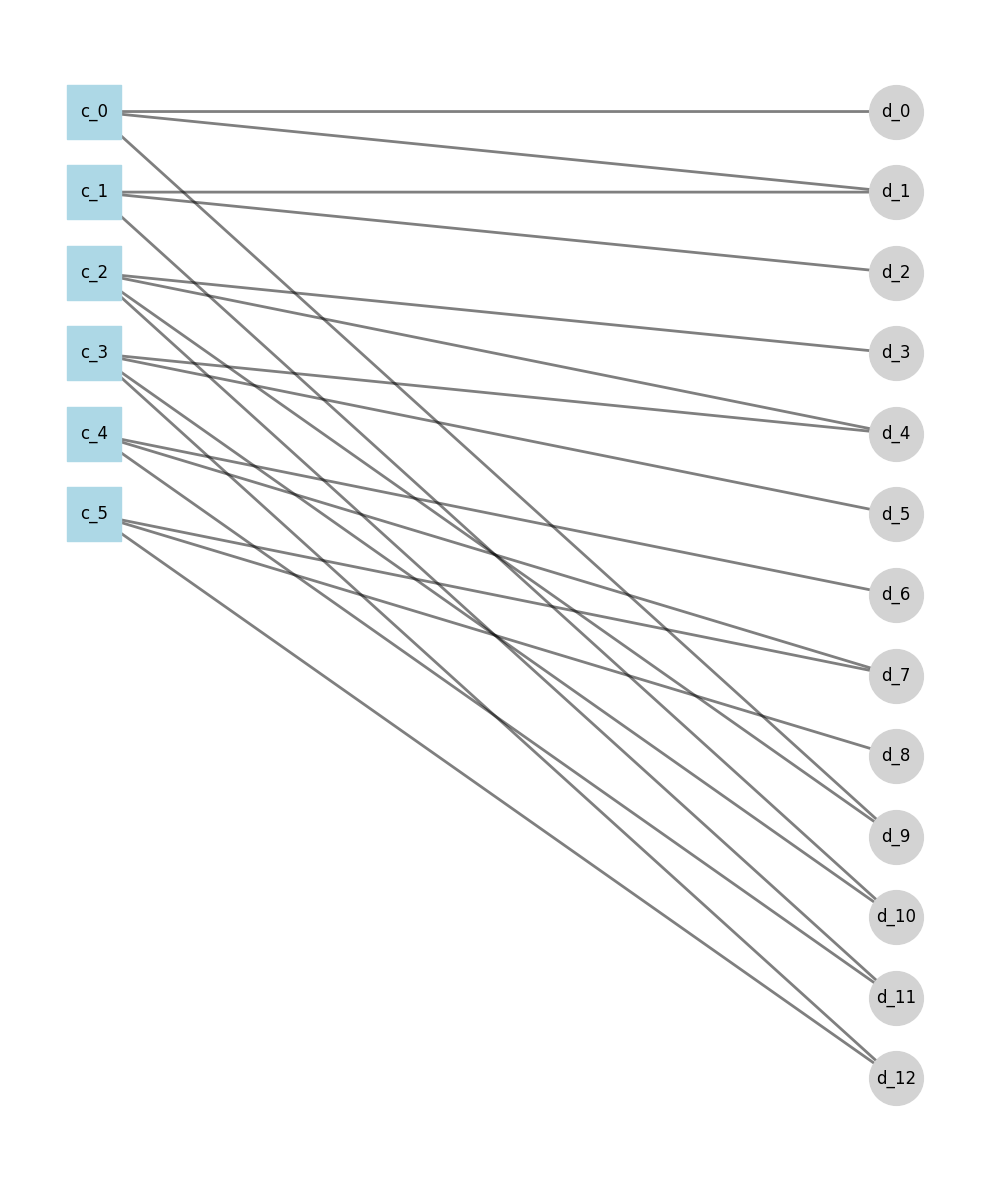

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
vertical_spacing = 2400

pos = {}
for i in range(num_checks):
    pos[f"c_{i}"] = (0, -i * vertical_spacing)  # x = 0, spread vertically
for i in range(num_qubits):
    pos[f"d_{i}"] = (1, -i * vertical_spacing)  # x = 1, align with similar vertical spacing

# Draw nodes
nx.draw_networkx_nodes(DG, pos, nodelist=[f"d_{i}" for i in np.arange(num_qubits)],
                       node_color='lightgrey', node_size=1500, node_shape='o')
nx.draw_networkx_nodes(DG, pos, nodelist=[f"c_{i}" for i in np.arange(num_checks)],
                       node_color='lightblue', node_size=1500, node_shape='s')

# Draw edges
nx.draw_networkx_edges(DG, pos, edgelist=DG.edges(), width=2, alpha=0.5, edge_color='black')

# Add labels
labels = {f"d_{i}": f"d_{i}" for i in np.arange(num_qubits)}
labels.update({f"c_{i}": f"c_{i}" for i in np.arange(num_checks)})
nx.draw_networkx_labels(DG, pos, labels, font_size=12, font_color="black")

plt.axis("off")
plt.tight_layout()
plt.show()


Shape of H: (15, 20)
Binary matrix H:
[[1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1]
 [0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]]
Nodes in the graph: ['d_0', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10', 'd_11', 'd_12', 'd_13', 'd_14', 'd_15', 'd_16', 'd_17', 'd_18', 'd_19', 'c_0', 'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8', 'c_9', 'c_10', 'c_11', 'c_12', 'c_13', 'c_14']
Edges in the graph: [('c_0', 'd_0')

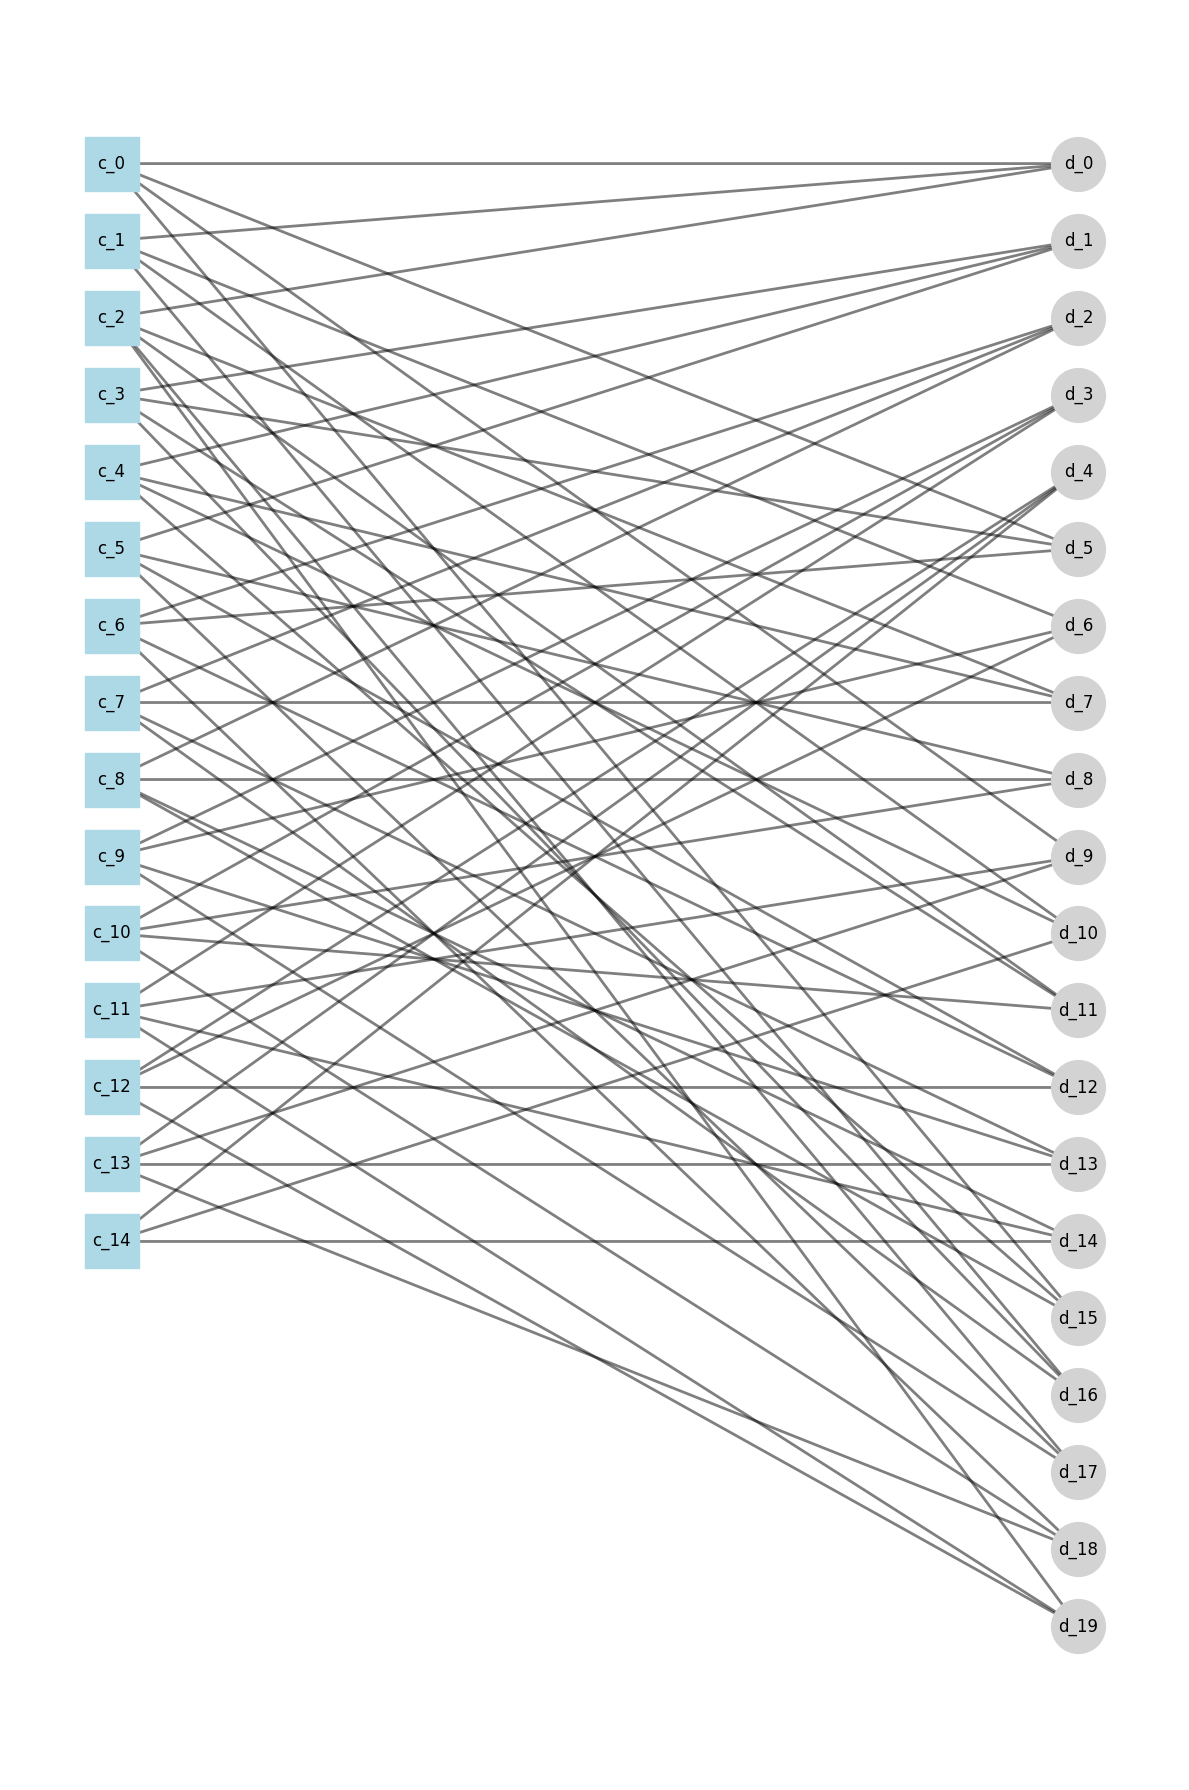

In [117]:
import networkx as nx
import matplotlib.pyplot as plt

# Provided input as raw multiline string
# index_input = """
# 15 20
# 0 9 5 15 
# 0 16 10 6 
# 0 7 11 17 19 
# 16 1 11 5 
# 1 10 15 7 
# 8 1 12 17 
# 2 18 12 5 
# 16 2 13 7 
# 8 2 14 15 
# 17 3 13 6 
# 8 11 18 3 
# 19 9 3 14 
# 19 4 12 6 
# 9 18 4 13 
# 10 4 14 
# """

filename = "PEG_HGP_code_(3,4)_family_n625_k25_classicalH.txt"

with open(filename, 'r') as f:
    lines = f.read().strip().split('\n')

# Parse the input
num_checks, num_qubits = map(int, lines[0].split())

H = np.zeros((num_checks, num_qubits), dtype=int)

for i, line in enumerate(lines[1:]):
    indices = list(map(int, line.strip().split()))
    for j in indices:
        H[i, j] = 1

print("Shape of H:", H.shape)
print("Binary matrix H:")
print(H)


check_connections = [list(map(int, line.split())) for line in lines[1:]]

# Build graph
DG = nx.DiGraph()

# Add data and check nodes
DG.add_nodes_from([f"d_{i}" for i in range(num_qubits)])
DG.add_nodes_from([f"c_{i}" for i in range(num_checks)])

# Add edges based on check_connections
for c_idx, data_indices in enumerate(check_connections):
    for d_idx in data_indices:
        DG.add_edge(f"c_{c_idx}", f"d_{d_idx}")

print("Nodes in the graph:", list(DG.nodes))
print("Edges in the graph:", list(DG.edges))

# Step 3: Define layout
vertical_spacing = 2400
pos = {}

for i in range(num_checks):
    pos[f"c_{i}"] = (0, -i * vertical_spacing)
for i in range(num_qubits):
    pos[f"d_{i}"] = (1, -i * vertical_spacing)

# Step 4: Draw graph
plt.figure(figsize=(12, 18))

nx.draw_networkx_nodes(DG, pos, nodelist=[f"d_{i}" for i in range(num_qubits)],
                       node_color='lightgrey', node_size=1500, node_shape='o')
nx.draw_networkx_nodes(DG, pos, nodelist=[f"c_{i}" for i in range(num_checks)],
                       node_color='lightblue', node_size=1500, node_shape='s')

nx.draw_networkx_edges(DG, pos, edgelist=DG.edges(), width=2, alpha=0.5, edge_color='black')

# Add labels
labels = {f"d_{i}": f"d_{i}" for i in np.arange(num_qubits)}
labels.update({f"c_{i}": f"c_{i}" for i in np.arange(num_checks)})
nx.draw_networkx_labels(DG, pos, labels, font_size=12, font_color="black")

plt.axis("off")
plt.tight_layout()
plt.show()
